In [1053]:
#importazione librerie 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1054]:
#caricamento dataset
data = pd.read_csv("C:/Users/39331/Desktop/AlessioRigattiPython/googleplaystore.csv")

In [1055]:
#dataset 
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [1056]:
#info per capire il type delle colonne, ci saranno alcune colonne da convertire il type per poter lavorarci
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1057]:
#rinomino la colonna content rating per comodità
data.rename(columns={'Content Rating': 'Content_Rating'}, inplace= True)

In [1058]:
#rimuove le colonne duplicate
data.drop_duplicates(['App','Size','Installs','Rating','Price','Android Ver'],inplace= True)

In [1059]:
#togliamo le colonne inutili che non servono per l'analisi
data.drop(['Genres','Last Updated','Current Ver',"Android Ver","Size"],axis=1,inplace=True)

In [1060]:
#tipologie delle categorie 
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [1061]:
#cancello quel 1.9 che è un dato inutile nel dataset
data=data[data["Category"]!="1.9"]

In [1062]:
#valori unici delle installazioni
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [1063]:
data["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [1064]:
data=data[data["Type"]!= None ]

In [1065]:
#valori unici del content rating
data["Content_Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [1066]:
#controlliamo se ci sono valori nulli 
data.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Installs             0
Type                 1
Price                0
Content_Rating       0
dtype: int64

In [1067]:
#adesso abbiamo 8878 righe visto che abbiamo eliminato le righe con i valori nulli
data.shape

(9682, 8)

In [1068]:
# sostituisce + e , con "" e dopo converte in type float
data.Installs= data["Installs"].str.replace("+", "")
data.Installs= data["Installs"].str.replace(",", "")

data["Installs"] = data.Installs.astype(float)

In [1069]:
# converte la colonna reviews in type float
data.Reviews= data.Reviews.astype(float) 

In [1070]:
# sostituisce $ con ""  e dopo converte in type float 
data["Price"]= data["Price"].str.replace("$", "")

data["Price"]= data.Price.astype(float)

In [1071]:
#adesso abbiamo una dataset pulito con le info utili che ci servono
data.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone


In [1072]:
#possiamo notare come i generi adulti only 18+ e unrated siano pochi,possiamo eliminarli in quanto non c'è grande concorrenza
data.groupby("Content_Rating").Type.value_counts()

Content_Rating   Type
Adults only 18+  Free       3
Everyone         Free    7271
                 Paid     655
Everyone 10+     Free     290
                 Paid      31
Mature 17+       Free     375
                 Paid      18
Teen             Free     984
                 Paid      52
Unrated          Free       2
Name: Type, dtype: int64

In [1073]:
#anche dalla media delle installazioni x genere vediamo che sono le due categorie la media più bassa
data.groupby("Content_Rating").Installs.mean().sort_values(ascending=False)

Content_Rating
Teen               1.591436e+07
Everyone 10+       1.247289e+07
Everyone           6.630553e+06
Mature 17+         6.203529e+06
Adults only 18+    6.666667e+05
Unrated            2.525000e+04
Name: Installs, dtype: float64

In [1074]:
data = data[(data["Content_Rating"]!="Adults only 18+") & (data["Content_Rating"]!="Unrated")]

In [1075]:
#deviazione standard(std): quanto i dati distribuiti distano rispetto al valore medio(media)
data.describe()

,Rating,Reviews,Installs,Price
count,8214.000000,9.677000e+03,9.677000e+03,9677.000000
mean,4.173496,2.172587e+05,7.801519e+06,1.097254
std,0.536286,1.831211e+06,5.372835e+07,16.836536
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.740000e+02,1.000000e+05,0.000000
75%,4.500000,2.950500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


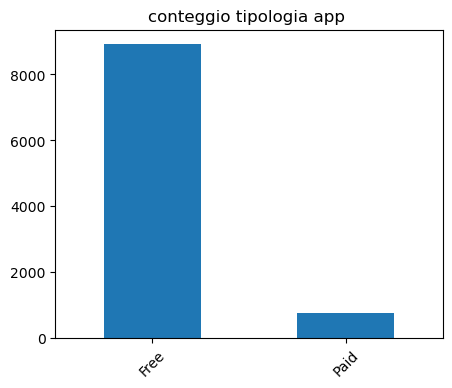

In [1076]:
#rappresentazione grafica del conteggio tipi di app
data["Type"].value_counts().plot.bar(figsize = (5,4))
plt.title("conteggio tipologia app ")
plt.xticks(rotation=45)
plt.show()

In [1077]:
#creo dataset per analizzare i rating senza i valori nulli
data_rating = data.dropna()

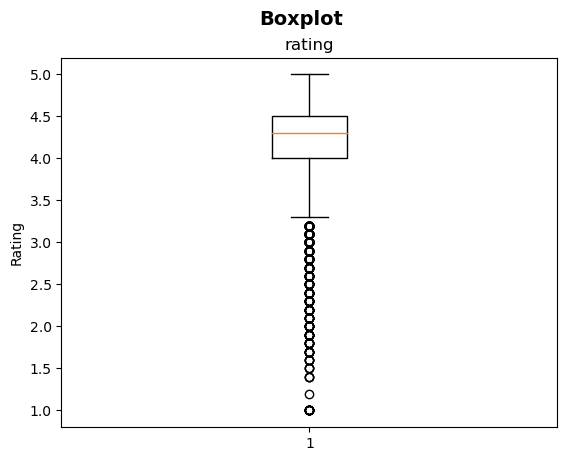

In [1078]:
# grafico boxplot per vedere qual'è il range di valutazione più comune
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(data_rating['Rating'])
ax.set_title('rating')
ax.set_ylabel('Rating')

plt.show()

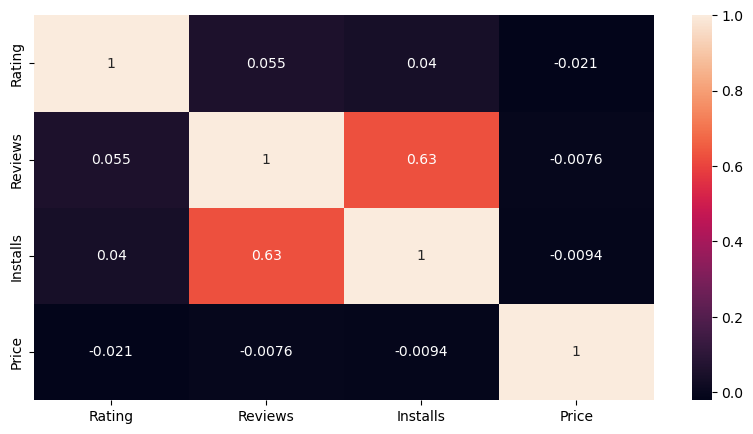

In [1079]:
#grafico per vedere se c'è correlazione tra le colonne
#correlazione positiva tra recensioni e installazioni:
#significa che più ci sono recensioni e più aumenteranno il numero di installazioni e viceversa
#perchè piu installazioni più probabilità di recensioni e viceversa
plt.figure(figsize=(10,5))
corr= data.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [1080]:
#creo un dataset con le app gratis
data_gratis = data[data["Price"]==0]

In [1081]:
#creo un dataset con le app a pagamento
data_pagamento = data[data["Price"]!=0]

In [1082]:
#creo una colonna guadagni per vedere quale app o categoria ha guadagnato di più
data_pagamento['guadagni'] = data_pagamento['Installs'] * data_pagamento['Price']

C:\Users\39331\AppData\Local\Temp\ipykernel_1516\44929765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pagamento['guadagni'] = data_pagamento['Installs'] * data_pagamento['Price']


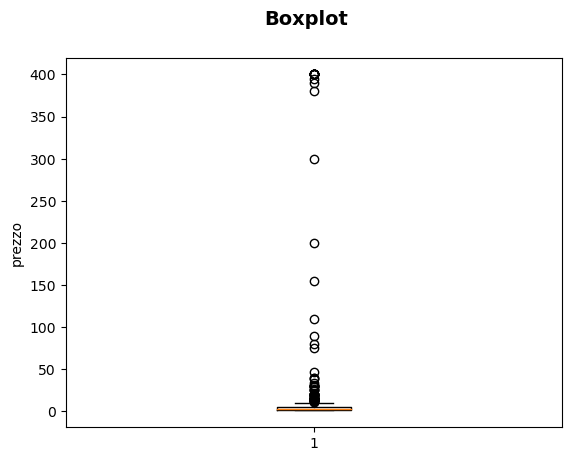

In [1083]:
# grafico boxplot per vedere qual'è il range della dimensione più frequente
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(data_pagamento['Price'])
ax.set_ylabel('prezzo')

plt.show()

In [1084]:
#prezzi alti non ritornano molte installazioni nonostante le valutazioni siano buone
#prezzo alto garantisce guadagni alti nel breve ma essendoci poche installazioni e poche recensioni
#meglio optare per un prezzo che si aggira dai 0.99 ai 6.99 
data_pagamento.sort_values(by= "Price",ascending = False).nlargest(10,"Price")

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,guadagni
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,10000.0,Paid,400.00,Everyone,4000000.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,1000.0,Paid,399.99,Everyone,399990.0
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,10000.0,Paid,399.99,Everyone,3999900.0
5369,I am Rich,FINANCE,4.3,180.0,5000.0,Paid,399.99,Everyone,1999950.0
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,1000.0,Paid,399.99,Teen,399990.0
5362,I Am Rich Pro,FAMILY,4.4,201.0,5000.0,Paid,399.99,Everyone,1999950.0
5359,I am rich(premium),FINANCE,3.5,472.0,5000.0,Paid,399.99,Everyone,1999950.0
4197,most expensive app (H),FAMILY,4.3,6.0,100.0,Paid,399.99,Everyone,39999.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,50000.0,Paid,399.99,Everyone,19999500.0
5354,I am Rich Plus,FAMILY,4.0,856.0,10000.0,Paid,399.99,Everyone,3999900.0


In [1085]:
#top 10 app con più guadagni
data_pagamento.sort_values(by="guadagni" ,ascending=False).head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,guadagni
2241,Minecraft,FAMILY,4.5,2376564.0,10000000.0,Paid,6.99,Everyone 10+,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547.0,100000.0,Paid,399.99,Everyone,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,50000.0,Paid,399.99,Everyone,19999500.0
4034,Hitman Sniper,GAME,4.6,408292.0,10000000.0,Paid,0.99,Mature 17+,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,1000000.0,Paid,6.99,Mature 17+,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,1000000.0,Paid,5.99,Everyone,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966.0,1000000.0,Paid,5.99,Everyone,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766.0,1000000.0,Paid,4.99,Everyone,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,10000.0,Paid,400.00,Everyone,4000000.0
5354,I am Rich Plus,FAMILY,4.0,856.0,10000.0,Paid,399.99,Everyone,3999900.0


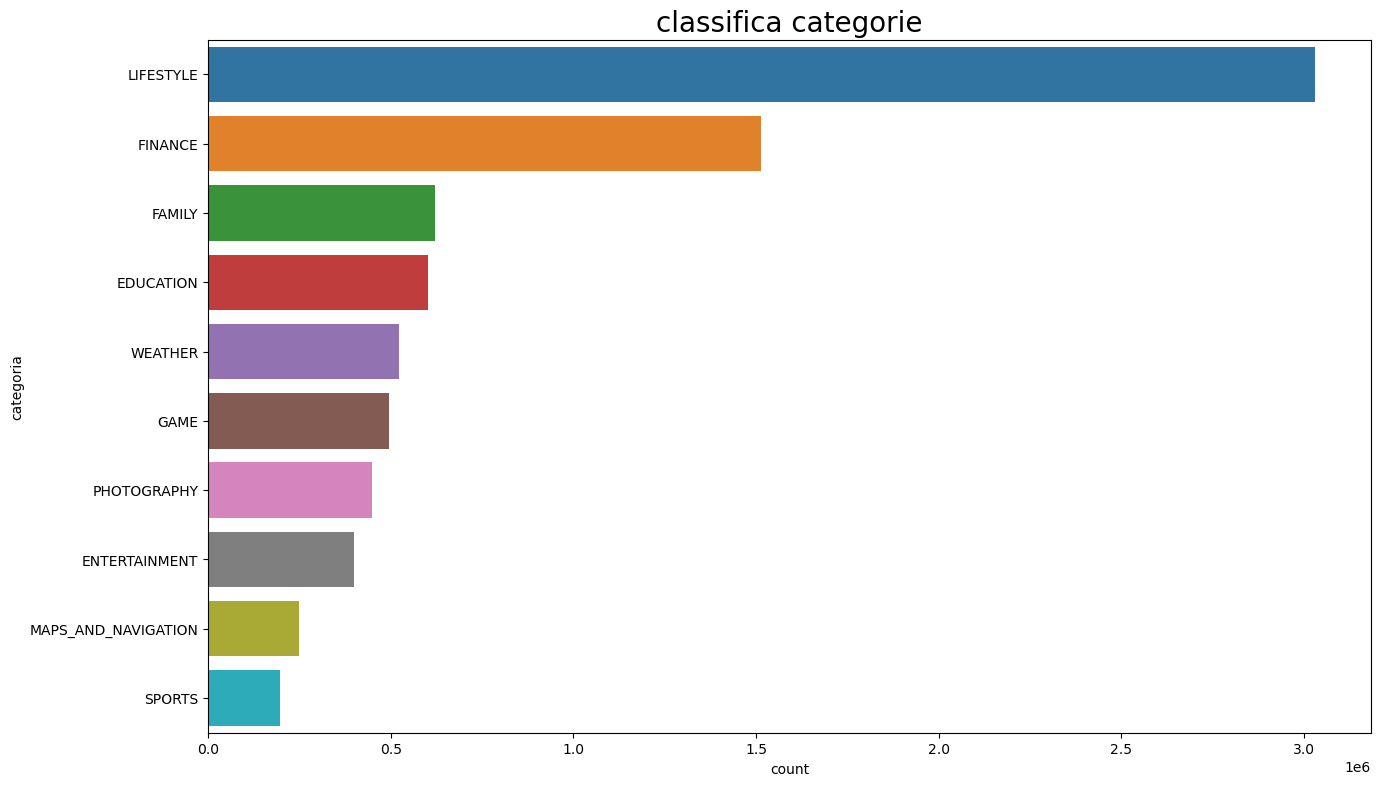

In [1086]:
#top 10 categorie con guadagni più alti
count_guadagni = data_pagamento.groupby("Category").guadagni.mean().sort_values(ascending=False).head(10)
x=[]
y=[]

for i in range(len(count_guadagni)):
    x.append(count_guadagni[i])
    y.append(count_guadagni.index[i])
    
plt.figure(figsize=(15,9))
plt.ylabel('categoria')
plt.xlabel('count')
graph = sns.barplot(x=x,y=y)
graph.set_title("classifica categorie", fontsize = 20);

In [1087]:
# 10 prezzi più comuni
data_pagamento["Price"].value_counts().nlargest(10).sort_values(ascending=False)

0.99      145
2.99      124
1.99       73
4.99       70
3.99       57
1.49       46
5.99       26
2.49       25
9.99       19
399.99     12
Name: Price, dtype: int64

In [1088]:
#le app più installate sono quelle con prezzi contenuti,domina la categoria game
data_pagamento.sort_values(by=["Installs"] , ascending= False).head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,guadagni
4034,Hitman Sniper,GAME,4.6,408292.0,10000000.0,Paid,0.99,Mature 17+,9900000.0
2241,Minecraft,FAMILY,4.5,2376564.0,10000000.0,Paid,6.99,Everyone 10+,69900000.0
5631,Five Nights at Freddy's,GAME,4.6,100805.0,1000000.0,Paid,2.99,Teen,2990000.0
8860,Bloons TD 5,FAMILY,4.6,190086.0,1000000.0,Paid,2.99,Everyone,2990000.0
3405,HD Widgets,PERSONALIZATION,4.3,58617.0,1000000.0,Paid,0.99,Everyone,990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553.0,1000000.0,Paid,5.99,Everyone,5990000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962.0,1000000.0,Paid,6.99,Mature 17+,6990000.0
6675,Infinity Dungeon VIP,FAMILY,4.3,21804.0,1000000.0,Paid,0.99,Everyone 10+,990000.0
2242,Card Wars - Adventure Time,FAMILY,4.3,129603.0,1000000.0,Paid,2.99,Everyone 10+,2990000.0
4842,Zombie Avengers:(Dreamsky)Stickman War Z,GAME,4.3,13604.0,1000000.0,Paid,0.99,Teen,990000.0


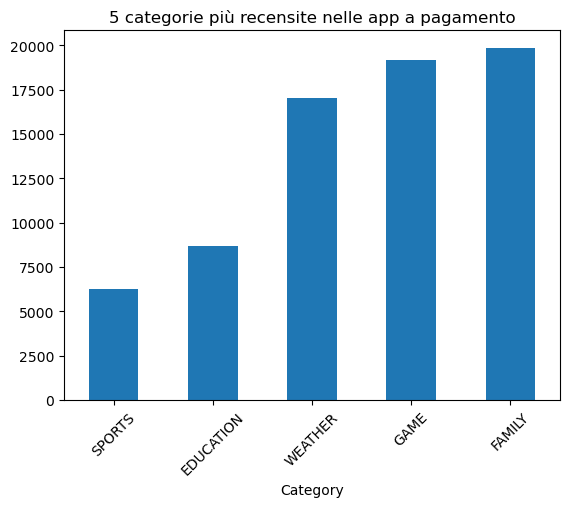

In [1089]:
#5 categorie con più recensioni app pagamento(media)
data_pagamento.groupby(["Category"]).Reviews.mean().nlargest(5).sort_values(ascending = True).plot.bar()
plt.title("5 categorie più recensite nelle app a pagamento")
plt.xticks(rotation=45)

plt.show()

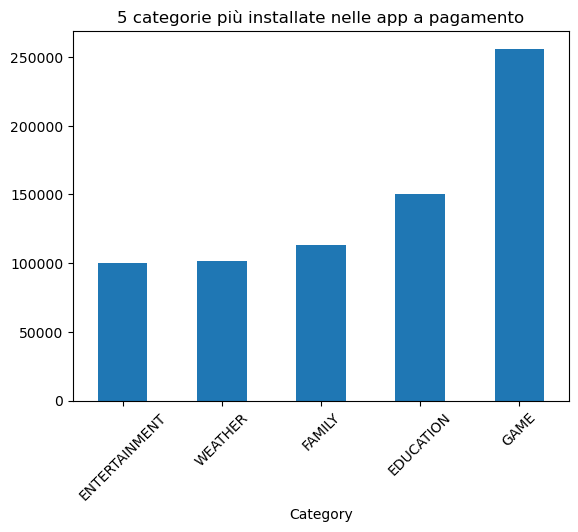

In [1090]:
#5 categorie con più installazioni app pagamento(media)
data_pagamento.groupby(["Category"]).Installs.mean().nlargest(5).sort_values(ascending = True).plot.bar()
plt.title("5 categorie più installate nelle app a pagamento")
plt.xticks(rotation=45)

plt.show()

In [1091]:
#app più installate 
top_app_installate=data_gratis.sort_values(by="Installs", ascending= False)
top_app_installate.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating
2545,Instagram,SOCIAL,4.5,66577313.0,1.000000e+09,Free,0.0,Teen
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,1.000000e+09,Free,0.0,Teen
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,1.000000e+09,Free,0.0,Everyone
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,1.000000e+09,Free,0.0,Teen
1654,Subway Surfers,GAME,4.5,27722264.0,1.000000e+09,Free,0.0,Everyone 10+
2544,Facebook,SOCIAL,4.1,78158306.0,1.000000e+09,Free,0.0,Teen
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,1.000000e+09,Free,0.0,Everyone
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,1.000000e+09,Free,0.0,Everyone
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1.000000e+09,Free,0.0,Everyone
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,1.000000e+09,Free,0.0,Everyone


In [1092]:
#app più installate e votate 
top_app_installate_votate = data_gratis.sort_values(by=["Installs", "Rating"], ascending=False)
top_app_installate_votate.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating
1654,Subway Surfers,GAME,4.5,27722264.0,1.000000e+09,Free,0.0,Everyone 10+
2545,Instagram,SOCIAL,4.5,66577313.0,1.000000e+09,Free,0.0,Teen
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,1.000000e+09,Free,0.0,Everyone
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1.000000e+09,Free,0.0,Everyone
3234,Google,TOOLS,4.4,8033493.0,1.000000e+09,Free,0.0,Everyone
3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,1.000000e+09,Free,0.0,Everyone
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,1.000000e+09,Free,0.0,Everyone
340,Gmail,COMMUNICATION,4.3,4604324.0,1.000000e+09,Free,0.0,Everyone
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,1.000000e+09,Free,0.0,Teen
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,1.000000e+09,Free,0.0,Everyone


In [1093]:
top_installate_recensite = data_gratis.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installate_recensite.head(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating
2544,Facebook,SOCIAL,4.1,78158306.0,1.000000e+09,Free,0.0,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,1.000000e+09,Free,0.0,Everyone
2545,Instagram,SOCIAL,4.5,66577313.0,1.000000e+09,Free,0.0,Teen
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,1.000000e+09,Free,0.0,Everyone
1654,Subway Surfers,GAME,4.5,27722264.0,1.000000e+09,Free,0.0,Everyone 10+
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,1.000000e+09,Free,0.0,Teen
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,1.000000e+09,Free,0.0,Everyone
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,1.000000e+09,Free,0.0,Everyone
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,1.000000e+09,Free,0.0,Everyone
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,1.000000e+09,Free,0.0,Everyone


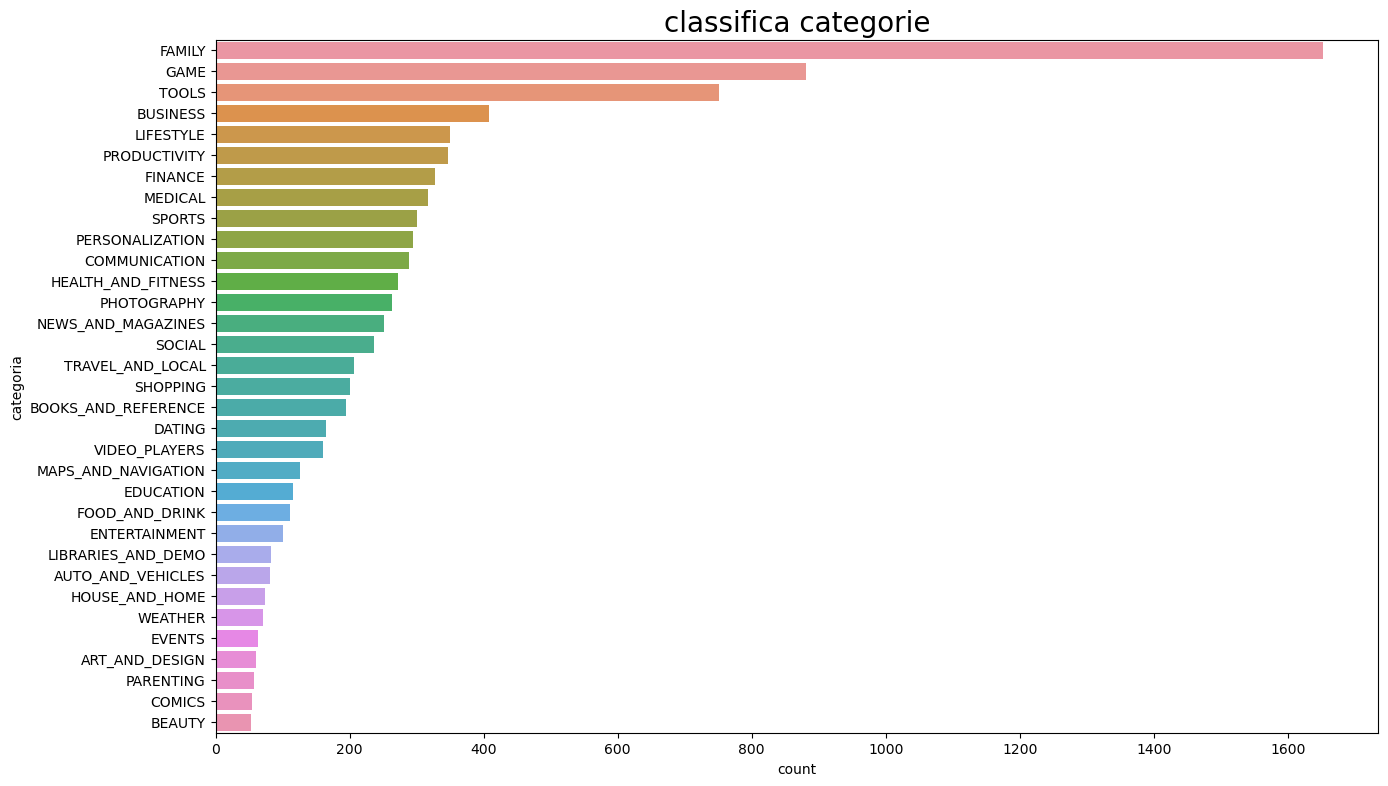

In [1094]:
#grafico per vedere le categorie più frequenti
category_count = data_gratis['Category'].value_counts()
x=[]
y=[]

for i in range(len(category_count)):
    x.append(category_count[i])
    y.append(category_count.index[i])
    
plt.figure(figsize=(15,9))
plt.ylabel('categoria')
plt.xlabel('count')
graph = sns.barplot(x=x,y=y)
graph.set_title("classifica categorie", fontsize = 20);

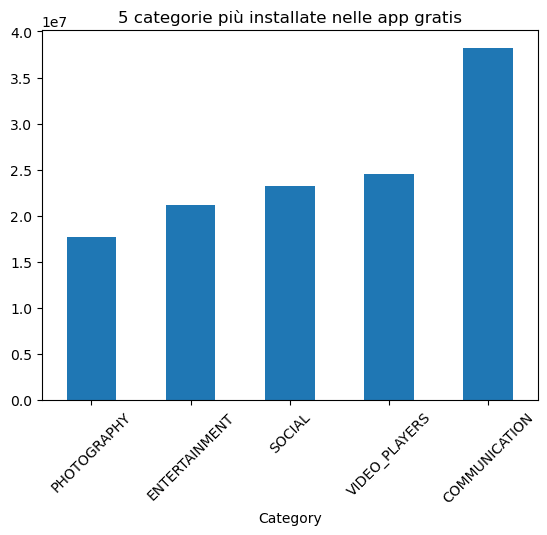

In [1095]:
#5 categorie con più installazioni app gratis(media)
data_gratis.groupby(["Category"]).Installs.mean().nlargest(5).sort_values(ascending = True).plot.bar()
plt.title("5 categorie più installate nelle app gratis")
plt.xticks(rotation=45)

plt.show()

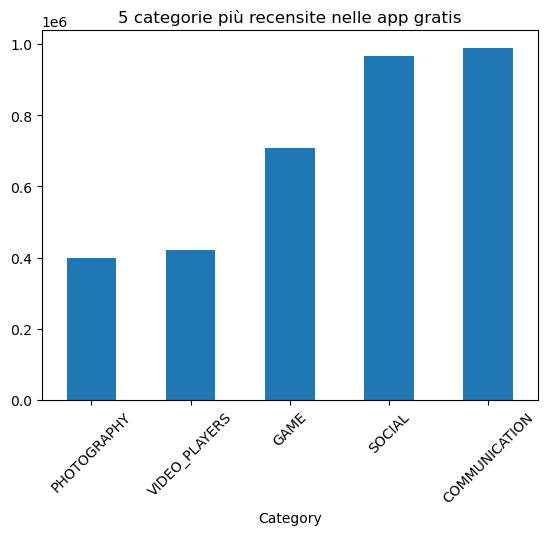

In [1096]:
#5 categorie con più recensioni app gratis
data_gratis.groupby(["Category"]).Reviews.mean().nlargest(5).sort_values(ascending = True).plot.bar()
plt.title("5 categorie più recensite nelle app gratis")
plt.xticks(rotation=45)

plt.show()

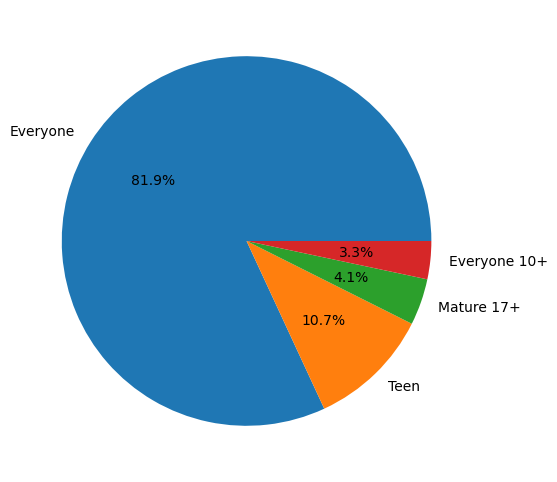

In [1097]:
#la maggior parte dell app sono per un pubblico misto senza limiti di età
plt.figure(figsize=(6,6))
labels = data['Content_Rating'].value_counts(sort = True).index
sizes = data['Content_Rating'].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [1098]:
game=data_pagamento[data_pagamento["Category"]=="GAME"]

In [1099]:
prezzo_medio=game.Price.mean()
prezzo_medio

3.467195121951223

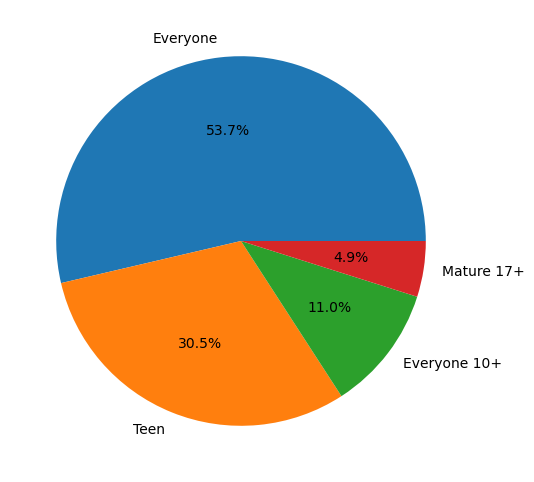

In [1100]:
#la maggior parte dell app sono per un pubblico misto senza limiti di età
plt.figure(figsize=(6,6))
labels = game['Content_Rating'].value_counts(sort = True).index
sizes = game['Content_Rating'].value_counts(sort = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [1101]:
game2=game.groupby("Content_Rating")["guadagni","Installs","Reviews"].sum().reset_index()
game2.head()

,Content_Rating,guadagni,Installs,Reviews
0,Everyone,11294961.45,4226405.0,368384.0
1,Everyone 10+,1908730.00,1327000.0,87752.0
2,Mature 17+,16939999.00,11050100.0,759732.0
3,Teen,10544946.40,4396460.0,356983.0


In [1102]:
#come app opterei per categoria GAME,visto che sia nelle app gratis e a pagamento è una categoria molto installata e recensita
#anche come guadagni è nelle prime 5 categorie top
#sceglierei un app con un pubblico rivolto ad everyone dato che non c'è un genere che spicca per guadagni 

In [1103]:
installazioni=game2.Installs.mean()
installazioni

5249991.25

In [1104]:
potenziale_guadagno = prezzo_medio*installazioni

print(f'potenziale guadagno app game: {potenziale_guadagno}')

potenziale guadagno app game: 18202744.052286606
